# Testing Aigents Cognitive Distortions Analysis API

Resources:
- Basic paper: https://www.pnas.org/doi/10.1073/pnas.2102061118
- Descriptions: https://t.me/collectivei/5401
- All emojis: https://emojidb.org/language-emojis
- Related: https://github.com/YisroelLen/Cognitive-Distortions-LFS


## Rendering distortions
- 😱🌋🌊🌪☄️📛Catastrophizing: Exaggerating the importance of negative events 
- ⚖️⚪️⚫️☯️Dichotomous Reasoning: Thinking that an inherently continuous situation can only fall into two categories 
- 👎💩Disqualifying the Positive: Unreasonably discounting positive experiences
- 💔💖💓🖤Emotional Reasoning: Thinking that something is true based on how one feels, ignoring the evidence to the contrary
- 🔮Fortune-telling: Making predictions, usually negative ones, about the future 
- 🏷Labeling and mislabeling: Labeling yourself or others while discounting evidence that could lead to less disastrous conclusions
- 🔬🔭🔎Magnification and Minimization: Magnifying negative aspects or minimizing positive aspects
- 🙅Mental Filtering: Paying too much attention to negative details instead of the whole picture
- 😎🧙‍♂️🧘‍♂️👳🏽Mindreading: Believing you know what others are thinking
- 📉Overgeneralizing: Making sweeping negative conclusions based on a few examples
- 🙇🏼🤦🏼Personalizing: Believing others are behaving negatively because of oneself, without considering more plausible or external explanations for behavior
- 📌🗜🚫Should statements: Having a fixed idea on how you and/or others should behave
- 🎭😊😟🤼‍♂️🤼‍♀️ Contradictive statements: Opposition of positive and negative references to the same situation or context
- 😊Positive statements: Emotionally positive sentiment about situation or context 
- 😟Negative statements: Emotionally negtative sentiment about situation or context 
- 😳Rude statements: Emotionally rude (obscene vocabulary) expressions about situation or context
    
Source: https://emojidb.org/

## Distortions in Russian (Google Translated)

- 😱🌋🌊🌪☄️📛Катастрофизация: преувеличение важности негативных событий.
- ⚖️⚪️⚫️☯️Дихотомическое мышление: мысль о том, что непрерывная по своей сути ситуация может делиться только на две категории.
- 👎💩Дисквалификация позитива: необоснованное обесценивание позитивного опыта.
- 💔💖💓🖤Эмоциональное мышление: думать, что что-то верно, основываясь на своих чувствах, игнорируя доказательства обратного.
- 🔮Гадание: предсказания будущего, обычно негативные.
- 🏷Навешивание ярлыков и неправильные ярлыки: навешивание ярлыков на себя и других, при этом игнорируя доказательства, которые могли бы привести к менее катастрофическим выводам.
- 🔬🔭🔎Увеличение и минимизация: усиление отрицательных аспектов или минимизация положительных аспектов.
- 🙅Ментальная фильтрация: слишком много внимания уделяется негативным деталям, а не всей картине.
- 😎🧙‍♂️🧘‍♂️👳🏽Чтение мыслей: вера в то, что вы знаете, о чем думают другие.
- 📉Чрезмерное обобщение: делать радикальные отрицательные выводы на основе нескольких примеров.
- 🤦🙇🏼Персонализация: убеждение, что другие ведут себя негативно из-за себя, без рассмотрения более правдоподобных или внешних объяснений поведения.
- 📌🗜🚫Утверждения о том, что следует: наличие фиксированного представления о том, как вам и/или другим следует вести себя.
- 🎭Противоречивые утверждения: Противопоставление положительных и отрицательных упоминаний об одной и той же ситуации или контексте.
- 😊Позитивные утверждения: эмоционально позитивное отношение к ситуации или контексту.
- 😟Негативные утверждения: эмоционально негативное мнение о ситуации или контексте.
- 😳Грубые высказывания: эмоционально грубые (нецензурная лексика) выражения о ситуации или контексте.


In [1]:
import os, sys, math
cwd = os.getcwd()
project_path = cwd[:cwd.find('pygents')+7]
if project_path not in sys.path: sys.path.append(project_path)
os.chdir(project_path) 

import datetime as dt
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

if 'pygents.aigents_api' in sys.modules:
    del sys.modules['pygents.aigents_api']
if 'pygents.util' in sys.modules:
    del sys.modules['pygents.util']
if 'pygents.text_metrics' in sys.modules:
    del sys.modules['pygents.text_metrics']

from pygents.aigents_api import AigentsSentiment, PygentsSentiment, TextMetrics, load_lines
from pygents.util import vector_proximity
from pygents.text_metrics import psy_metric_lists, psy_metric_texts
from pygents.text_matching import FuzzyMatcher

def language_metrics(lang,metrics_list):
    metrics = {}
    for m in metrics_list:
        metrics[m] = './data/dict/' + lang + '/' + m + '.txt'
    return metrics

        
p = PygentsSentiment('./data/dict/en/positive.txt',
                     './data/dict/en/negative.txt',debug=True)
a = TextMetrics(language_metrics('en',['catastrophizing','dichotomous-reasoning']),debug=True)
s = TextMetrics(language_metrics('en',['positive','negative']),debug=True)

print(a.gram_arity)
print(s.gram_arity)


[nltk_data] Downloading package punkt to /Users/akolonin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


4
6


In [2]:
a.metrics


{'catastrophizing': {('will', 'be', 'a', 'catastrophe'),
  ('will', 'be', 'a', 'disaster'),
  ('will', 'be', 'horrible'),
  ('will', 'be', 'impossible'),
  ('will', 'be', 'terrible'),
  ('will', 'end'),
  ('will', 'fail'),
  ('will', 'go', 'wrong'),
  ('will', 'never', 'end'),
  ('will', 'not', 'end'),
  ('will', 'not', 'happen')},
 'dichotomous-reasoning': {('all',),
  ('always',),
  ('black', 'or', 'white'),
  ('either', 'or'),
  ('ever',),
  ('every',),
  ('everybody',),
  ('everyone',),
  ('everything',),
  ('everywhere',),
  ('neither',),
  ('never',),
  ('no', 'one'),
  ('nobody',),
  ('nor',),
  ('not', 'a', 'single'),
  ('nothing',),
  ('nowhere',),
  ('only',),
  ('perfect',),
  ('the', 'best'),
  ('the', 'worst'),
  ('worthless',)}}

In [3]:
for m in s.metrics:
    ngrams = s.metrics[m]
    for n in ngrams:
        if len(n) > 4:
            print(n)


('feel', 'like', 'a', 'million', 'dollars')
('revelation', 'of', 'saint', 'john', 'the', 'divine')
('pull', 'a', 'fast', 'one', 'on')
('too', 'big', 'for', "one's", 'breeches')
('respiratory', 'distress', 'syndrome', 'of', 'the', 'newborn')


In [4]:
texts = ['good news','bad news','good bad news','good and pleasant news about bad things','good bad cloud','empty spaces']
for t in texts:
    sentiment = p.get_sentiment(t)
    metrics = s.get_sentiment_words(t)
    assert sentiment[1] == (metrics['positive'] if 'positive' in metrics else 0) 
    assert sentiment[2] == (-metrics['negative'] if 'negative' in metrics else 0) 
    print(sentiment,metrics,t)


(0.85, 0.85, -0.0, 0.0, 2, 1) {'positive': 0.85} good news
(-0.85, 0.0, -0.85, 0.0, 2, 1) {'negative': 0.85} bad news
(0.0, 0.77, -0.77, 0.77, 3, 1) {'positive': 0.77, 'negative': 0.77, 'contradictive': 0.77} good bad news
(0.14, 0.74, -0.59, 0.66, 7, 1) {'positive': 0.74, 'negative': 0.59, 'contradictive': 0.66} good and pleasant news about bad things
(0.0, 0.77, -0.77, 0.77, 3, 1) {'positive': 0.77, 'negative': 0.77, 'contradictive': 0.77} good bad cloud
(0.0, 0.0, -0.0, 0.0, 2, 1) {} empty spaces


In [5]:
texts = ['empty spaces',
         'i will fail',
         'i will fail without of glass of water',
         'i will fail without of glass of water and bottle of whiskey',
         'i will fail without of glass of water and bottle of whiskey every day',
         'never ever',
         'damn cold']
for t in texts:
    metrics = a.get_sentiment_words(t)
    print(metrics,t)


{} empty spaces
{'catastrophizing': 0.92} i will fail
{'catastrophizing': 0.71} i will fail without of glass of water
{'catastrophizing': 0.62} i will fail without of glass of water and bottle of whiskey
{'catastrophizing': 0.59, 'dichotomous-reasoning': 0.46} i will fail without of glass of water and bottle of whiskey every day
{'dichotomous-reasoning': 1.0} never ever
{} damn cold


In [6]:
labels = ['positive','negative','rude',
'catastrophizing','dichotomous-reasoning','disqualifying-positive','emotional-reasoning','fortune-telling',
'labeling','magnification','mental-filtering','mindreading','overgeneralizing','personalizing','should-statement']
l = TextMetrics(language_metrics('en',labels),debug=False)
for t in texts:
    metrics = l.get_sentiment_words(t)
    print(metrics,t)


{} empty spaces
{'catastrophizing': 0.92} i will fail
{'catastrophizing': 0.71} i will fail without of glass of water
{'catastrophizing': 0.62} i will fail without of glass of water and bottle of whiskey
{'catastrophizing': 0.59, 'dichotomous-reasoning': 0.46} i will fail without of glass of water and bottle of whiskey every day
{'negative': 0.85, 'dichotomous-reasoning': 1.0} never ever
{'negative': 1.0, 'rude': 0.85} damn cold


In [7]:
text = ''
with open('./data/corpora/English/fishing/sample1.txt') as f:
    lines = f.readlines()
for line in lines:
    text += line
lists = {}
metrics = l.get_sentiment_words(text,lists,debug=False)
print(lists)
metrics

{'positive': [('security',), ('truth',), ('humble',), ('reputable',), ('come', 'to'), ('master',), ('best',), ('sincerely',), ('possible',), ('contain',), ('due',), ('please',), ('highly',), ('thank', 'you'), ('respect',), ('account',), ('honour',), ('just',), ('consider',), ('know',), ('good', 'for', 'you'), ('trust',)], 'negative': [('against',), ('get', 'back'), ("don't",), ('suffered',), ('sorrow',), ('mysteriously',), ('death',), ('died',), ('crisis',), ('not',), ('have',), ('sad',), ('incessant',), ('does', 'not')], 'personalizing': [('because', 'i')], 'dichotomous-reasoning': [('only',), ('nor',)], 'rude': [('god',)], 'overgeneralizing': [('completely',)], 'magnification': [('best',)]}


{'positive': 0.45,
 'negative': 0.38,
 'personalizing': 0.08,
 'dichotomous-reasoning': 0.08,
 'rude': 0.04,
 'overgeneralizing': 0.04,
 'magnification': 0.04,
 'contradictive': 0.41}

## Representing Distortions 

{'positive': [('security',), ('truth',), ('humble',), ('reputable',), ('come', 'to'), ('master',), ('best',), ('sincerely',), ('possible',), ('contain',), ('due',), ('please',), ('highly',), ('thank', 'you'), ('respect',), ('account',), ('honour',), ('just',), ('consider',), ('know',), ('good', 'for', 'you'), ('trust',)], 'negative': [('against',), ('get', 'back'), ("don't",), ('suffered',), ('sorrow',), ('mysteriously',), ('death',), ('died',), ('crisis',), ('not',), ('have',), ('sad',), ('incessant',), ('does', 'not')], 'personalizing': [('because', 'i')], 'dichotomous-reasoning': [('only',), ('nor',)], 'rude': [('god',)], 'overgeneralizing': [('completely',)], 'magnification': [('best',)]}
(['Positive statements', 'Negative statements', 'Contradictive statements', 'Rude statements', 'Dichotomous Reasoning', 'Magnification and Minimization', 'Overgeneralizing', 'Personalizing'], [0.45, 0.38, 0.41, 0.04, 0.08, 0.04, 0.04, 0.08])

😊😊Positive statements
😟😟Negative statements
🎭🎭Contradic

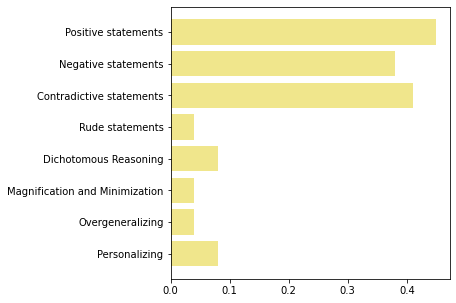

In [8]:
text = ''
with open('./data/corpora/English/fishing/sample1.txt') as f:
    lines = f.readlines()
for line in lines:
    text += line
lists = {}
metrics = l.get_sentiment_words(text,lists,debug=False)
print(lists)
metric_lists = psy_metric_lists(metrics,emojis=False)
print(metric_lists)
print()
metric_texts = psy_metric_texts(metrics)
print('\n'.join(metric_texts))
plt.rcParams["figure.figsize"] = (5,5)
bars = plt.barh(metric_lists[0], metric_lists[1], color='khaki')
plt.gca().invert_yaxis()
plt.show()

(['Позитивные высказывания', 'Негативные высказывания', 'Противоречивые высказывания', 'Грубые высказывания', 'Дихотомическое мышление', 'Преувеличение и преуменьшение', 'Чрезмерное обобщение', 'Персонализация'], [0.45, 0.38, 0.41, 0.04, 0.08, 0.04, 0.04, 0.08])

😊😊Позитивные высказывания
😟😟Негативные высказывания
🎭🎭Противоречивые высказывания
😳Грубые высказывания
⚖️Дихотомическое мышление
🔬Преувеличение и преуменьшение
📉Чрезмерное обобщение
🙇🏼Персонализация


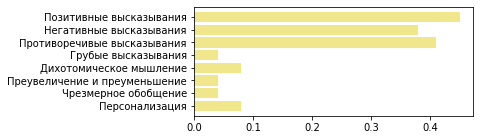

In [9]:
metric_lists = psy_metric_lists(metrics,lang='ru')
print(metric_lists)
print()
metric_texts = psy_metric_texts(metrics,lang='ru')
print('\n'.join(metric_texts))
plt.rcParams["figure.figsize"] = (5,int(round(5*len(metric_texts)/16)))
bars = plt.barh(metric_lists[0], metric_lists[1], color='khaki')
plt.gca().invert_yaxis()
plt.show()

{'overgeneralizing': 0.03, 'negative': 0.3, 'positive': 0.47, 'dichotomous-reasoning': 0.04, 'should-statement': 0.01, 'contradictive': 0.38}
😊😊Positive statements, 😟😟Negative statements, 🎭🎭Contradictive statements, ⚖️Dichotomous Reasoning, 📉Overgeneralizing, 📌Should statements


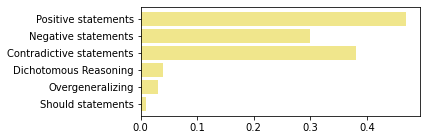

In [10]:
link = "https://www.wired.com/story/fast-forward-ai-powerful-secretive/"
html = requests.get(link).text  
soup = BeautifulSoup(html)
text = soup.get_text()
lists = {}
metrics = l.get_sentiment_words(text,lists,debug=False)
print(metrics)
metric_texts = psy_metric_texts(metrics)
print(', '.join(metric_texts))
metric_lists = psy_metric_lists(metrics)
bars = plt.barh(metric_lists[0], metric_lists[1], color='khaki')
plt.gca().invert_yaxis()


😊😊Positive statements
😟😟Negative statements
🎭🎭Contradictive statements
😳Rude statements
⚖️Dichotomous Reasoning
🙇🏼Personalizing
📌Should statements


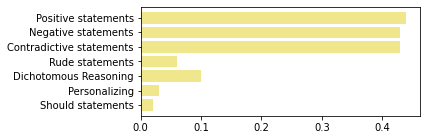

In [11]:
link = "https://futurism.com/ai-expert-bomb-datacenters"
html = requests.get(link).text  
soup = BeautifulSoup(html)
text = soup.get_text()
text
lists = {}
metrics = l.get_sentiment_words(text,lists,debug=False)
metric_texts = psy_metric_texts(metrics)
print('\n'.join(metric_texts))
metric_lists = psy_metric_lists(metrics)
bars = plt.barh(metric_lists[0], metric_lists[1], color='khaki')
plt.gca().invert_yaxis()

In [12]:
#TEST
l.get_sentiment_words("I love myself",lists,debug=False)

{'positive': 0.77}

In [13]:
l.get_sentiment_words("I hate myself",lists,debug=False)

{'negative': 0.77}

In [14]:
texts = ["I hate myself", 
         "I hate myself, this will not end",
         #"I hate myself, this will not end, nobody likes me",
         #"good but, I hate myself, this will not end, nobody likes me",
         #"because it feels, good but, I hate myself, this will not end, nobody likes me, it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, ",
         "she will not, because it feels, good but, I hate myself, this will not end, nobody likes me, it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, ",
        ]


In [15]:
for text in texts:
    lists = {}
    metrics = l.get_sentiment_words(text,lists,debug=False)
    metric_texts = psy_metric_texts(metrics)
    print(text)
    print('\n'.join(metric_texts))
    print()


I hate myself
😟😟😟😟Negative statements

I hate myself, this will not end
😟😟😟Negative statements
😱😱😱😱Catastrophizing

she will not, because it feels, good but, I hate myself, this will not end, nobody likes me, it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, 
😊😊Positive statements
😟Negative statements
🎭🎭Contradictive statements
😱😱Catastrophizing
⚖️Dichotomous Reasoning
👎Disqualifying the Positive
💔💔Emotional Reasoning
🔮🔮Fortune-telling



I hate myself


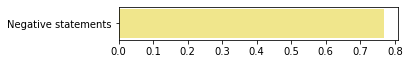

I hate myself, this will not end


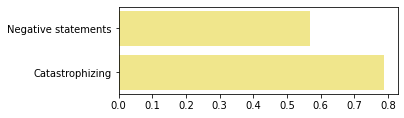

she will not, because it feels, good but, I hate myself, this will not end, nobody likes me, it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, 


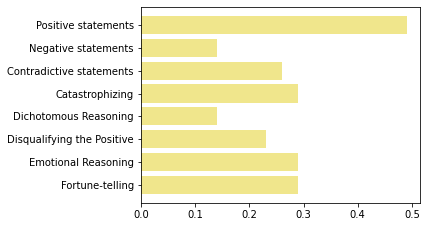

In [16]:
for text in texts:
    lists = {}
    metrics = l.get_sentiment_words(text,lists,debug=False)
    metric_texts = psy_metric_texts(metrics)
    print(text)
    #print('\n'.join(metric_texts))
    metric_lists = psy_metric_lists(metrics)
    plt.rcParams["figure.figsize"] = (5,0.6+int(round(4*len(metric_texts)/12)))
    bars = plt.barh(metric_lists[0], metric_lists[1], color='khaki')
    plt.gca().invert_yaxis()
    plt.show()

I hate myself


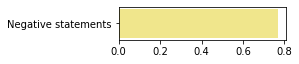

I hate myself, this will not end


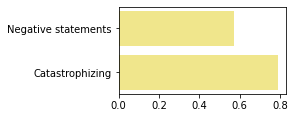

she will not, because it feels, good but, I hate myself, this will not end, nobody likes me, it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, 


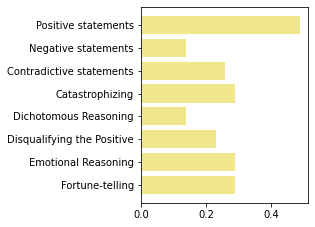

In [17]:
for text in texts:
    lists = {}
    metrics = l.get_sentiment_words(text,lists,debug=False)
    metric_texts = psy_metric_texts(metrics)
    print(text)
    #print('\n'.join(metric_texts))
    metric_lists = psy_metric_lists(metrics)
    plt.rcParams["figure.figsize"] = (3,0.6+int(round(4*len(metric_texts)/12)))
    bars = plt.barh(metric_lists[0], metric_lists[1], color='khaki')
    plt.gca().invert_yaxis()
    plt.show()

I hate myself


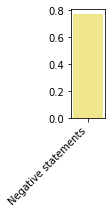

I hate myself, this will not end


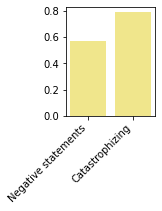

she will not, because it feels, good but, I hate myself, this will not end, nobody likes me, it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, 


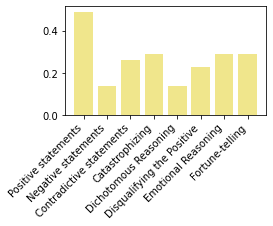

In [18]:
for text in texts:
    lists = {}
    metrics = l.get_sentiment_words(text,lists,debug=False)
    metric_texts = psy_metric_texts(metrics)
    print(text)
    #print('\n'.join(metric_texts))
    metric_lists = psy_metric_lists(metrics)
    plt.rcParams["figure.figsize"] = (0.6+int(round(4*len(metric_texts)/12)),2)
    bars = plt.bar(metric_lists[0], metric_lists[1], color='khaki')
    plt.xticks(rotation=45, ha='right')
    plt.show()

In [19]:
def barh_labeled(categories,values):
    #plt.rcParams["figure.figsize"] = (3,0.6+int(round(4*len(metric_texts)/12)))
    fig, ax = plt.subplots(figsize=(4,0.6+int(round(4*len(categories)/12))))
    bars = ax.barh(categories, values, color='khaki')
    ax.axes.get_yaxis().set_visible(False)

    i = 0
    # Add labels that overlay the bars
    for bar, value in zip(bars, values):
        width = bar.get_width()
        #print(width)
        # Position text at the end of each bar, centered vertically
        ax.text(width, bar.get_y() + bar.get_height()/2, 
                categories[i], ha='right', va='center', 
                #color='black', fontweight='bold')
                color='black')
        i += 1

    #plt.tight_layout()
    plt.show()



I hate myself


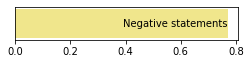

I hate myself, this will not end


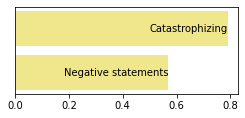

she will not, because it feels, good but, I hate myself, this will not end, nobody likes me, it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, , it is like that alpha beta gamma here is irrelevannt text just to ooccumpy some place in the text, 


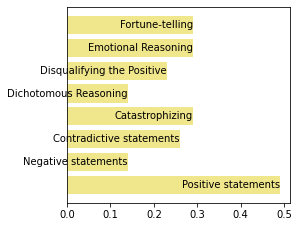

In [20]:
for text in texts:
    lists = {}
    metrics = l.get_sentiment_words(text,lists,debug=False)
    metric_texts = psy_metric_texts(metrics)
    print(text)
    #print('\n'.join(metric_texts))
    metric_lists = psy_metric_lists(metrics)
    barh_labeled(metric_lists[0], metric_lists[1])


### MD-based explanation

In [21]:
def find_first_alpha_position(s):
    for i, char in enumerate(s):
        if char.isalpha():
            return i
    return -1


In [22]:
text = "Everything will go wrong because I am a loser and I feel responsible for all my failures."
labels = ['catastrophizing','dichotomous-reasoning','disqualifying-positive','emotional-reasoning',
          'fortune-telling', 'labeling','magnification','mental-filtering','mindreading','overgeneralizing',
          'personalizing','should-statement']
metrics, markup = l.get_sentiment_words_markup(text,lists = {},markup=True,metrics=labels,debug=False)
metric_texts = psy_metric_texts(metrics,lang='en',extended=True,lists=lists,emojis=False,markup=True)
for t in sorted(metric_texts, key=lambda s: s[find_first_alpha_position(s):]):
    print('1. '+t)
print(); print(f'"{markup}"')

1. 😱Catastrophizing - Exaggerating the importance of negative events : __will not end__
1. ⚖️Dichotomous Reasoning - Thinking that an inherently continuous situation can only fall into two categories : __nobody__
1. 🏷Labeling and mislabeling - Labeling yourself or others while discounting evidence that could lead to less disastrous conclusions
1. 🙇🏼Personalizing - Believing yourself or others are behaving negatively because of oneself, without considering more plausible or external explanations for behavior

"__everything will go wrong__ because __i am a__ loser and __i feel responsible__ for __all my__ failures ."


1. 😱Catastrophizing - Exaggerating the importance of negative events : __will go wrong__
1. ⚖️Dichotomous Reasoning - Thinking that an inherently continuous situation can only fall into two categories : __everything__
1. 🏷Labeling and mislabeling - Labeling yourself or others while discounting evidence that could lead to less disastrous conclusions : __i am a__
1. 🙇🏼Personalizing - Believing yourself or others are behaving negatively because of oneself, without considering more plausible or external explanations for behavior : __i feel responsible__, __all my__

"__everything will go wrong__ because __i am a__ loser and __i feel responsible__ for __all my__ failures ."

## Test lexicon-based error normalization

In [27]:
l = TextMetrics(language_metrics('en',labels),debug=False)
metrics, markup = l.get_sentiment_words_markup("it will be a catastrophe for everything",lists = {},markup=True,metrics=labels,debug=False)
print(metrics, markup)

l = TextMetrics(language_metrics('en',labels),debug=False)
metrics, markup = l.get_sentiment_words_markup("it will be a catstrophe for everthing",lists = {},markup=True,metrics=labels,debug=False)
print(metrics, markup)

l = TextMetrics(language_metrics('en',labels),debug=False,
                fuzzy_matcher = FuzzyMatcher(set([l.split('\t')[0].strip() for l in load_lines('./data/dict/en/lexicon.txt')]),['chars']))
metrics, markup = l.get_sentiment_words_markup("it will be a catastrophe for everything",lists = {},markup=True,metrics=labels,debug=False)
print(metrics, markup)

l = TextMetrics(language_metrics('en',labels),debug=False,
                fuzzy_matcher = FuzzyMatcher(set([l.split('\t')[0].strip() for l in load_lines('./data/dict/en/lexicon.txt')]),['chars']))
metrics, markup = l.get_sentiment_words_markup("it will be a catstrophe for everthing",lists = {},markup=True,metrics=labels,debug=False)
print(metrics, markup)



{'catastrophizing': 0.88, 'dichotomous-reasoning': 0.59} it __will be a catastrophe__ for __everything__
{} it will be a catstrophe for everthing
{'catastrophizing': 0.88, 'dichotomous-reasoning': 0.59} it __will be a catastrophe__ for __everything__
{'catastrophizing': 0.88, 'dichotomous-reasoning': 0.59} it __will be a catastrophe__ for __everything__


In [26]:
#TODO emotion (overall)


